In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json


class bcolors:
    OK = '\033[92m\033[1m' #GREEN
    WARNING = '\033[93m\033[1m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR

Dataset Name:  PEMS_BAY
PEMS_BAY geo_file size: (325, 3)
PEMS_BAY dyna_file size: (16937700, 5)
PEMS_BAY rel_file size: (8358, 5)


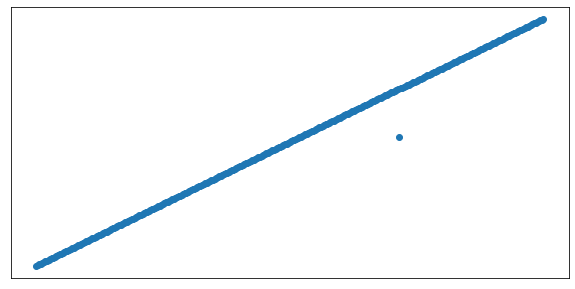

In [2]:
def read_data(dataset='METR_LA', postfix_path='../'):    
    print(bcolors.OK + 'Dataset Name: ', dataset + bcolors.RESET)
    
    # path
    path = postfix_path + 'raw_data/' + dataset + '/'
    config_path = path + 'config.json'
    dyna_path = path + dataset + '.dyna'
    geo_path = path + dataset + '.geo'
    rel_path = path + dataset + '.rel'
    config_path = path + 'config.json'
    
    # get data
    geo_file = pd.read_csv(geo_path)
    geo_ids = list(geo_file['geo_id'])
    dyna_file = pd.read_csv(dyna_path)
    rel_file = pd.read_csv(rel_path)
    f_config = open(config_path)
    config_file = json.load(f_config)
    
    print('{} geo_file size: {}'.format(dataset, geo_file.shape))
    print('{} dyna_file size: {}'.format(dataset, dyna_file.shape))
    print('{} rel_file size: {}'.format(dataset, rel_file.shape))
    return geo_file, geo_ids, dyna_file, rel_file, config_file

def visualise_network(geo_file):
    coordinates = geo_file['coordinates'].apply(lambda x: x.strip('][').split(', '))
    longitude = coordinates.map(lambda x: x[0])
    latitude = coordinates.map(lambda x: x[1])
    plt.figure(figsize=(10, 5))
    plt.scatter(x=longitude, y=latitude)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

dataset_name = 'PEMS_BAY'
geo_file, geo_ids, dyna_file, rel_file, config_file = read_data(dataset_name, '../')
visualise_network(geo_file)


In [3]:
geo_file

,geo_id,type,coordinates
0,400001,Point,"[-121.901149, 37.364084999999996]"
1,400017,Point,"[-121.94543999999999, 37.253303]"
2,400030,Point,"[-121.90653799999998, 37.359087]"
3,400040,Point,"[-121.87310900000001, 37.294949]"
4,400045,Point,"[-121.90223300000001, 37.363402]"
...,...,...,...
320,413845,Point,"[-121.925747, 37.422887]"
321,413877,Point,"[-121.89964199999999, 37.321613]"
322,413878,Point,"[-121.888603, 37.324641]"
323,414284,Point,"[-121.89653799999999, 37.323066]"


In [4]:
dyna_file

,dyna_id,type,time,entity_id,traffic_speed
0,0,state,2017-01-01T00:00:00Z,400001,71.4
1,1,state,2017-01-01T00:05:00Z,400001,71.6
2,2,state,2017-01-01T00:10:00Z,400001,71.6
3,3,state,2017-01-01T00:15:00Z,400001,71.1
4,4,state,2017-01-01T00:20:00Z,400001,71.7
...,...,...,...,...,...
16937695,16937695,state,2017-06-30T23:35:00Z,414694,66.2
16937696,16937696,state,2017-06-30T23:40:00Z,414694,68.4
16937697,16937697,state,2017-06-30T23:45:00Z,414694,66.6
16937698,16937698,state,2017-06-30T23:50:00Z,414694,68.4


In [5]:
rel_file

,rel_id,type,origin_id,destination_id,cost
0,0,geo,400001,400001,0.0
1,1,geo,400017,400017,0.0
2,2,geo,400030,400030,0.0
3,3,geo,400030,400045,5108.4
4,4,geo,400030,400065,7401.1
...,...,...,...,...,...
8353,8353,geo,414694,405701,1016.7
8354,8354,geo,414694,407710,2290.3
8355,8355,geo,414694,408907,8610.4
8356,8356,geo,414694,408911,9119.3


# Adjust density of data

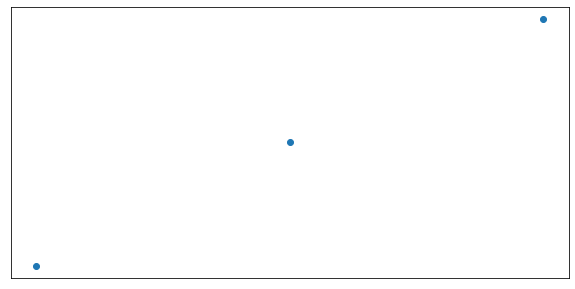

geo_file size:  (325, 3)
geo_file_adjusted size:  (3, 3)


In [6]:
# set the ratio of sampling
frac_ratio = 0.01
geo_file_adjusted = geo_file.sample(frac=frac_ratio)
visualise_network(geo_file_adjusted)
print('geo_file size: ', geo_file.shape)
print('geo_file_adjusted size: ', geo_file_adjusted.shape)

In [7]:
# Get id of chosen sensors
geo_ids_adjusted = list(geo_file_adjusted['geo_id'])
print('geo_id: ', len(geo_ids_adjusted))

# adjust dyna file
dyna_file_adjusted = dyna_file[dyna_file.entity_id.isin(geo_ids_adjusted)]
print('dyna_file size: ', dyna_file.shape)
print('dyna_file_adjusted size: ', dyna_file_adjusted.shape)
dyna_file_adjusted = dyna_file_adjusted.reset_index(drop=True)
dyna_file_adjusted.dyna_id = dyna_file_adjusted.index
print('----')

# adjust rel file
print('rel_file size: ', rel_file.shape)
# drop rows that do not contain chosen sensors (origin)
rel_file_adjusted = rel_file[rel_file.origin_id.isin(geo_ids_adjusted)]
# print(rel_file_adjusted.shape)
# drop rows that do not contain chosen sensors (destination)
rel_file_adjusted = rel_file_adjusted[rel_file_adjusted.destination_id.isin(geo_ids_adjusted)]
# print(rel_file_adjusted.shape)
# reset the index and rel_id
rel_file_adjusted = rel_file_adjusted.reset_index(drop=True)
rel_file_adjusted.rel_id = rel_file_adjusted.index
print('rel_file size: ', rel_file.shape)
print('rel_file_adjusted size: ', rel_file.shape)

geo_id:  3
dyna_file size:  (16937700, 5)
dyna_file_adjusted size:  (156348, 5)
----
rel_file size:  (8358, 5)
rel_file size:  (8358, 5)
rel_file_adjusted size:  (8358, 5)


In [8]:
dyna_file_adjusted

,dyna_id,type,time,entity_id,traffic_speed
0,0,state,2017-01-01T00:00:00Z,400922,69.5
1,1,state,2017-01-01T00:05:00Z,400922,69.1
2,2,state,2017-01-01T00:10:00Z,400922,69.1
3,3,state,2017-01-01T00:15:00Z,400922,69.1
4,4,state,2017-01-01T00:20:00Z,400922,69.1
...,...,...,...,...,...
156343,156343,state,2017-06-30T23:35:00Z,413877,70.5
156344,156344,state,2017-06-30T23:40:00Z,413877,69.4
156345,156345,state,2017-06-30T23:45:00Z,413877,70.6
156346,156346,state,2017-06-30T23:50:00Z,413877,70.2


In [9]:
rel_file

,rel_id,type,origin_id,destination_id,cost
0,0,geo,400001,400001,0.0
1,1,geo,400017,400017,0.0
2,2,geo,400030,400030,0.0
3,3,geo,400030,400045,5108.4
4,4,geo,400030,400065,7401.1
...,...,...,...,...,...
8353,8353,geo,414694,405701,1016.7
8354,8354,geo,414694,407710,2290.3
8355,8355,geo,414694,408907,8610.4
8356,8356,geo,414694,408911,9119.3


In [10]:
rel_file_adjusted

,rel_id,type,origin_id,destination_id,cost
0,0,geo,400922,400922,0.0
1,1,geo,401606,401606,0.0
2,2,geo,413877,413877,0.0


# Export to CSV

In [11]:

dataset_newname = dataset_name + '_' +str(frac_ratio)
path = '../' + 'raw_data/' + dataset_newname
if os.path.isdir(path):
    print(bcolors.WARNING + 'Folder already exists' + bcolors.RESET)
else:
    os.mkdir(path)
    print(bcolors.OK + 'Created dataset {}'.format(dataset_newname) + bcolors.RESET)
    



Created dataset PEMS_BAY_0.01


In [12]:
geo_file_adjusted.to_csv(path+'/'+dataset_newname+'.geo', index=False)
dyna_file_adjusted.to_csv(path+'/'+dataset_newname+'.dyna', index=False)
rel_file_adjusted.to_csv(path+'/'+dataset_newname+'.rel', index=False)
